## exploring data through visualization

- Now that you've cleaned your data, you can find patterns in your data by creating plots. 
    - Histograms: we can use them to see the distribution of a variable
    - scatterplots: to see the relationship between two variables, and whenever we find a high correlation between two variables, we can use the feature in our analysis
- these plots can help us determine which variables to use in an analysis 

## Plotting with pandas
- note that the plot methods on series or dataframes are just simple wrappers around the matplotlib library
    - wrappers mean that they are just simple functions that call the more complex matplotlib functions
    - so, pandas is nice for quick insights, but we will need to use matplotlib for more complex plots and to dive into the details and customize our visualizations
- we can use the dataframes to plot 
    - histograms
    - pie charts
    - bar charts

In [2]:
import pandas as pd

%matplotlib inline 
df = pd.read_csv("census_income_data.csv")
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       30725 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      30718 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  31978 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [26]:
cancer_df = pd.read_csv("cancer_data.csv")
cancer_df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,radius_max,texture_max,perimeter_max,area_max,smoothness_max,compactness_max,concavity_max,concave_points_max,symmetry_max,fractal_dimension_max
0,842302,M,17.99,NaN,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,NaN,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,NaN,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,NaN,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [27]:
cancer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      569 non-null    int64  
 1   diagnosis               569 non-null    object 
 2   radius_mean             569 non-null    float64
 3   texture_mean            548 non-null    float64
 4   perimeter_mean          569 non-null    float64
 5   area_mean               569 non-null    float64
 6   smoothness_mean         521 non-null    float64
 7   compactness_mean        569 non-null    float64
 8   concavity_mean          569 non-null    float64
 9   concave_points_mean     569 non-null    float64
 10  symmetry_mean           504 non-null    float64
 11  fractal_dimension_mean  569 non-null    float64
 12  radius_SE               569 non-null    float64
 13  texture_SE              548 non-null    float64
 14  perimeter_SE            569 non-null    fl

### histograms in pandas
- using `df['column'].plot(kind='hist')` we can create a histogram of the column
    - or for the whole dataframe, `df.hist()`
- we can also specify the number of bins using the `bins` parameter
    - `df['column'].plot(kind='hist', bins=5)`
- we can also use the `alpha` parameter to make the bars transparent
    - `df['column'].plot(kind='hist', alpha=0.5)`
- we can also use the `cumulative` parameter to create a cumulative distribution
    - `df['column'].plot(kind='hist', cumulative=True)`
- we can also use the `orientation` parameter to change the orientation of the plot
    - `df['column'].plot(kind='hist', orientation='horizontal')`

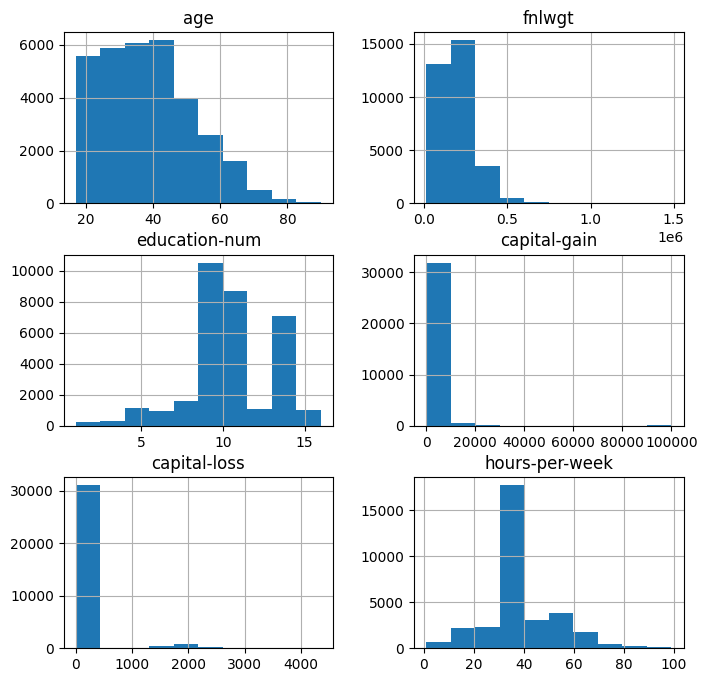

In [5]:
df.hist(figsize=(8,8));

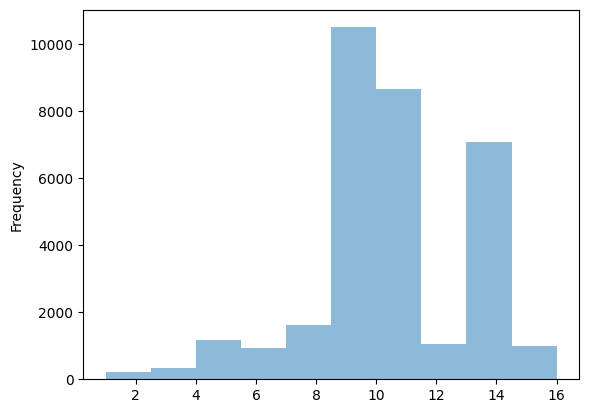

In [9]:
df["education-num"].plot(kind="hist", alpha=0.5);

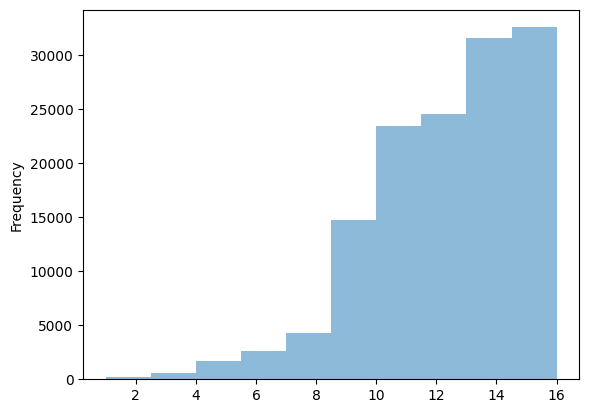

In [12]:
df["education-num"].plot(kind="hist", alpha=0.5,cumulative=True);

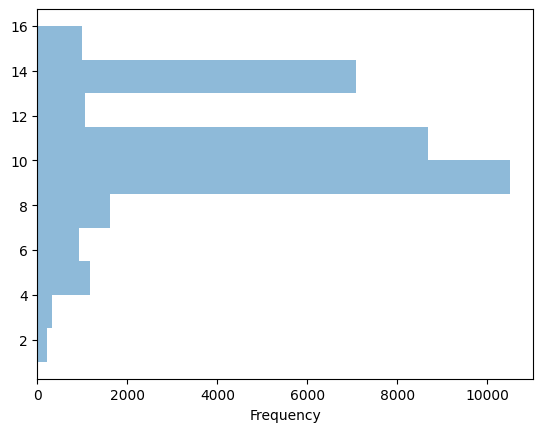

In [14]:
df["education-num"].plot(kind="hist", alpha=0.5,orientation="horizontal");

### bar charts in pandas
- to plot bar chart for categorical data, we can use the `value_counts()` method to count the frequency of each category
    - `df['column'].value_counts().plot(kind='bar')`

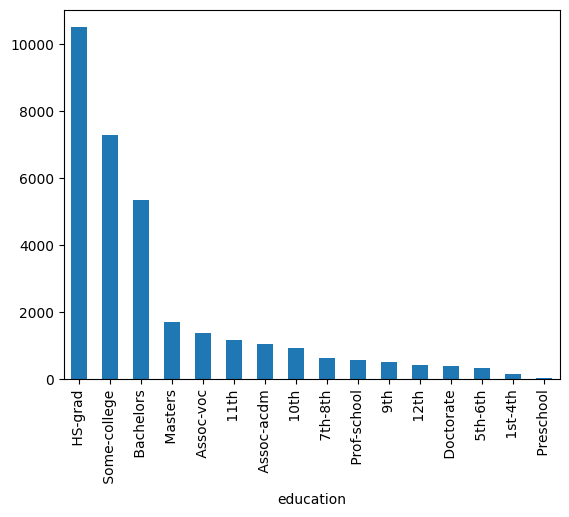

In [20]:
df["education"].value_counts().plot(kind="bar");

### pie charts in pandas

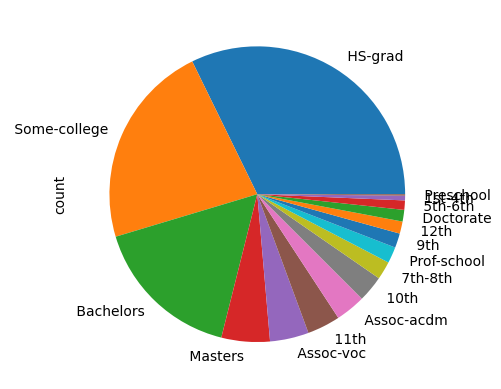

In [22]:
df["education"].value_counts().plot(kind="pie");

### scatter plots in pandas
- useful for getting quick insight into the relationships among numerical variables
- we can use `pd.plotting.scatter_matrix(df)` to create a scatter plot matrix
    - this will create a matrix of scatter plots for each pair of numerical variables as well as histograms for each variable along the diagonal
- to create a single scatter plot, we can use the `plot` method on the dataframe
    - `df.plot(kind='scatter', x='column1', y='column2')`

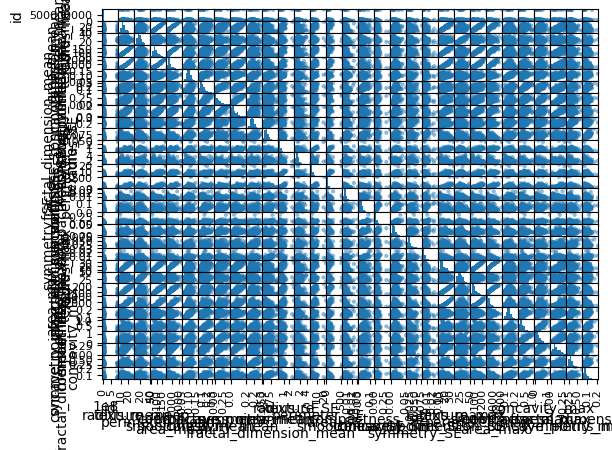

In [29]:
pd.plotting.scatter_matrix(cancer_df);

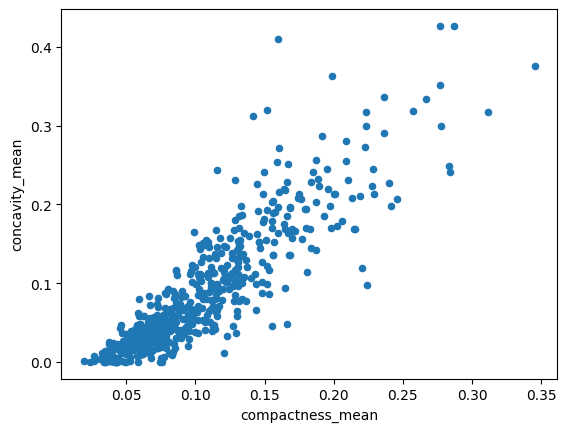

In [33]:
# since it is messy sometimes, we can plot single scatter plot 
cancer_df.plot(kind="scatter",x="compactness_mean",y="concavity_mean");

### box plot in pandas
- we said that box plots are useful for visualizing the distribution of numerical data
    - it shows the 5 number summary of the data
        - the minimum, first quartile, median, third quartile, and maximum
    - we can use the `plot` method on the dataframe to create a box plot
        - `df.plot(kind='box')`
- box plots are useful for many things
    - they can show the distribution of the data
    - they can show outliers
    - they can show the central tendency of the data
    - they can show the spread of the data

<Axes: >

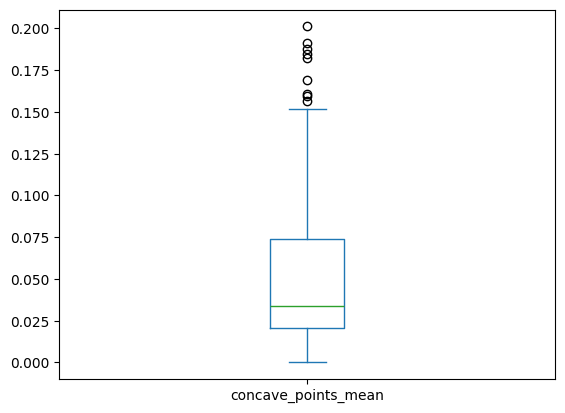

In [34]:
cancer_df["concave_points_mean"].plot(kind="box")